In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded=files.upload()

Saving EastWestAirlines.xlsx to EastWestAirlines.xlsx


In [3]:
fly=pd.read_excel('EastWestAirlines.xlsx')
fly

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
fly=fly.rename({'ID#':'ID','Award?':'Award'}, axis=1)
fly.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
fly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
fly[fly.duplicated(keep=False)]

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award


**Data Visualization**

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

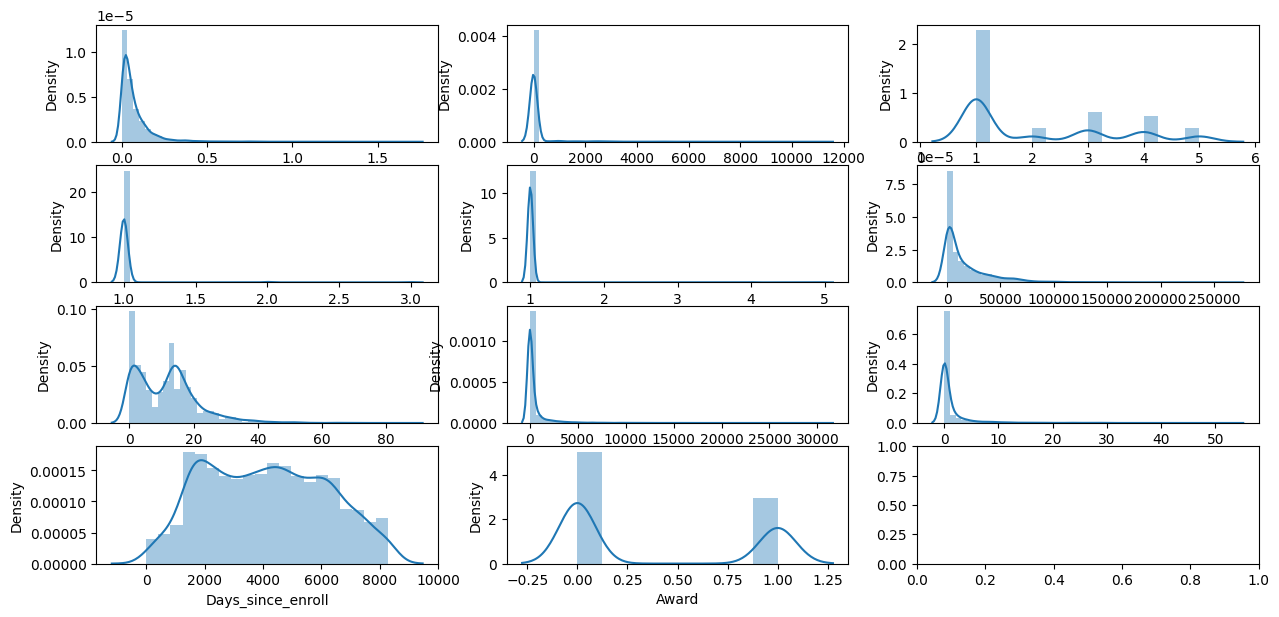

In [8]:
fig, ax= plt.subplots(4,3, figsize=(15,7))

sns.distplot(fly.Balance, ax=ax[0,0])
sns.distplot(fly.Qual_miles, ax=ax[0,1])
sns.distplot(fly.cc1_miles, ax=ax[0,2])
sns.distplot(fly.cc2_miles, ax=ax[1,0])
sns.distplot(fly.cc3_miles, ax=ax[1,1])
sns.distplot(fly.Bonus_miles, ax=ax[1,2])
sns.distplot(fly.Bonus_trans, ax=ax[2,0])
sns.distplot(fly.Flight_miles_12mo, ax=ax[2,1])
sns.distplot(fly.Flight_trans_12, ax=ax[2,2])
sns.distplot(fly.Days_since_enroll, ax=ax[3,0])
sns.distplot(fly.Award, ax=ax[3,1])

plt.show()

**Power Transform for standardising the distribution**

In [9]:
from sklearn.preprocessing import power_transform

In [10]:
fly_1=fly.iloc[:,1:]
fly_1_transform=power_transform(fly_1, method='yeo-johnson')

In [11]:
fly_1.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

In [12]:
fly_2=pd.DataFrame(fly_1_transform, columns=['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles','Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12','Days_since_enroll', 'Award'])
fly_2.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-0.346816,-0.244743,-0.844766,0.0,0.0,-1.178402,-1.329671,-0.683308,-0.674970,1.321776,-0.766919
1,-0.633084,-0.244743,-0.844766,0.0,0.0,-1.132416,-1.074960,-0.683308,-0.674970,1.308873,-0.766919
2,-0.038549,-0.244743,-0.844766,0.0,0.0,-0.191941,-0.688822,-0.683308,-0.674970,1.335468,-0.766919
3,-0.821989,-0.244743,-0.844766,0.0,0.0,-0.924946,-1.329671,-0.683308,-0.674970,1.302415,-0.766919
4,0.723596,-0.244743,1.343165,0.0,0.0,1.169363,1.329711,1.549026,1.685925,1.295549,1.303918


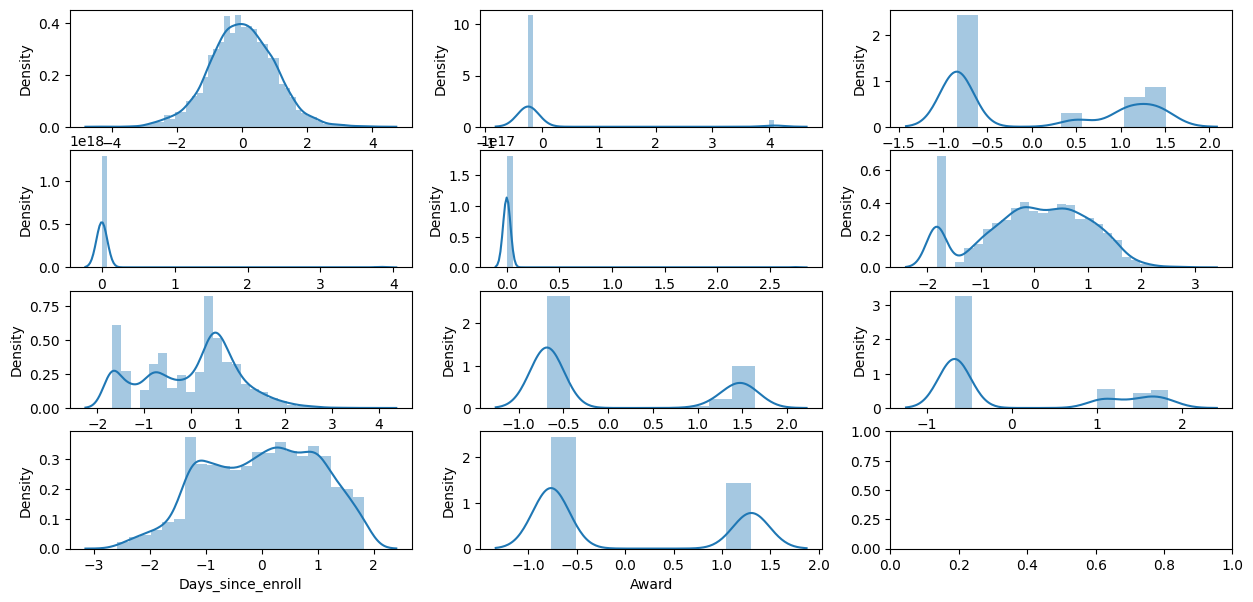

In [13]:
fig, ax= plt.subplots(4,3, figsize=(15,7))

sns.distplot(fly_2.Balance, ax=ax[0,0])
sns.distplot(fly_2.Qual_miles, ax=ax[0,1])
sns.distplot(fly_2.cc1_miles, ax=ax[0,2])
sns.distplot(fly_2.cc2_miles, ax=ax[1,0])
sns.distplot(fly_2.cc3_miles, ax=ax[1,1])
sns.distplot(fly_2.Bonus_miles, ax=ax[1,2])
sns.distplot(fly_2.Bonus_trans, ax=ax[2,0])
sns.distplot(fly_2.Flight_miles_12mo, ax=ax[2,1])
sns.distplot(fly_2.Flight_trans_12, ax=ax[2,2])
sns.distplot(fly_2.Days_since_enroll, ax=ax[3,0])
sns.distplot(fly_2.Award, ax=ax[3,1])

plt.show()

**HIERARCHICAL CLUSTERING**

1. Average Method

In [14]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score as sil

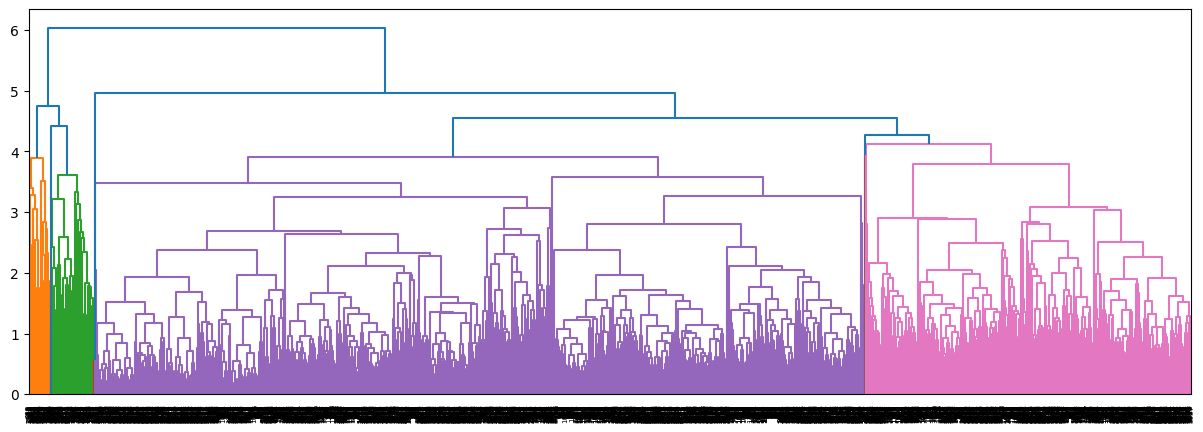

In [15]:
fig=plt.figure(figsize=(15,5))
dendrogram=sch.dendrogram(sch.linkage(fly_1_transform, method='average'))

In [16]:
hc_avg=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')

In [17]:
y_hc_avg=hc_avg.fit_predict(fly_1_transform)
y_hc_avg

array([4, 4, 4, ..., 4, 1, 4])

In [18]:
df_1=pd.DataFrame(y_hc_avg, columns=['Clusters_avg'])

In [19]:
fly_hc_avg=pd.concat([fly,df_1], axis=1)
fly_hc_avg.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters_avg
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [20]:
fly_hc_avg.groupby('Clusters_avg').mean().reset_index()

,Clusters_avg,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0,1799.350993,170339.198675,2508.019868,2.278146,1.013245,1.013245,28717.337748,18.344371,2574.390728,7.768212,4478.728477,0.768212
1,1,1891.090828,104075.087266,0.000000,2.290294,1.017809,1.016919,23897.578807,15.159394,1291.878896,3.845058,4368.430098,0.547640
2,2,1425.000000,125.000000,0.000000,1.000000,1.000000,1.000000,125.000000,1.000000,125.000000,1.000000,5163.500000,0.000000
3,3,2028.933333,57973.546667,2634.706667,2.000000,1.000000,1.000000,15002.626667,10.026667,0.000000,0.000000,4111.026667,0.400000
4,4,2079.624622,55659.328172,0.000000,1.951662,1.013595,1.010574,13694.672961,9.761329,0.000000,0.000000,3991.476586,0.271903


In [21]:
for i in range(5):
  print('Clusters:',i)
  print(len(list(fly_hc_avg[fly_hc_avg['Clusters_avg']==i]['ID'].values)))
  print()

Clusters: 0
151

Clusters: 1
1123

Clusters: 2
2

Clusters: 3
75

Clusters: 4
2648



In [22]:
sil_avg=(sil(fly_1_transform,hc_avg.labels_)*100).round(2)
sil_avg

24.51

2. Centroid Method

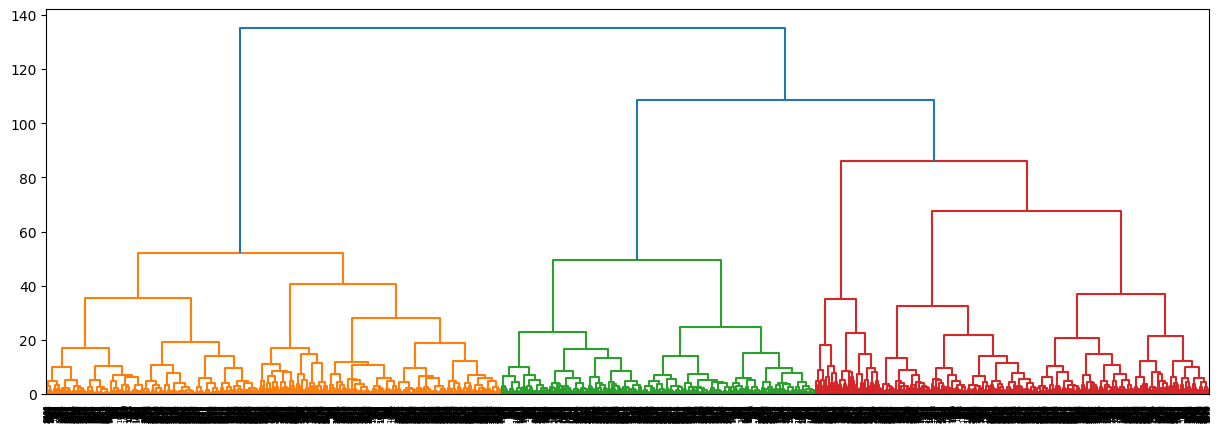

In [23]:
fig=plt.figure(figsize=(15,5))
dendrogram=sch.dendrogram(sch.linkage(fly_1_transform, method='ward'))

In [24]:
hc_cent=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

In [25]:
y_hc_cent=hc_cent.fit_predict(fly_1_transform)
y_hc_cent

array([0, 0, 0, ..., 2, 1, 0])

In [26]:
df_2=pd.DataFrame(y_hc_cent, columns=['Clusters_cent'])

In [27]:
fly_hc_cent=pd.concat([fly,df_2], axis=1)
fly_hc_cent.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters_cent
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4


In [28]:
fly_hc_cent.groupby('Clusters_cent').mean().reset_index()

,Clusters_cent,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0,2270.985322,33419.559030,0.000000,1.000000,1.022336,1.005105,2837.693044,5.463944,0.000000,0.000000,3631.267390,0.151883
1,1,2113.270270,77788.952703,0.000000,1.000000,1.030405,1.000000,6038.932432,8.885135,1403.608108,4.155405,3981.564189,0.429054
2,2,1802.231267,87897.735430,0.000000,3.331175,1.000925,1.018501,29432.774283,15.990749,0.000000,0.000000,4513.629972,0.445883
3,3,1875.539823,133049.712389,2550.061947,2.185841,1.008850,1.008850,24165.995575,15.584071,1720.057522,5.190265,4356.703540,0.646018
4,4,1642.568480,132880.887430,0.000000,3.718574,1.003752,1.035647,43643.870544,22.075047,1163.403377,3.489681,4801.103189,0.677298


In [29]:
for i in range(5):
  print('Clusters:',i)
  print('Total Members:', len(list(fly_hc_cent[fly_hc_cent['Clusters_cent']==i]['ID'].values)))
  print()

Clusters: 0
Total Members: 1567

Clusters: 1
Total Members: 592

Clusters: 2
Total Members: 1081

Clusters: 3
Total Members: 226

Clusters: 4
Total Members: 533



In [30]:
sil_cent=(sil(fly_1_transform,hc_cent.labels_)*100).round(2)
sil_cent

32.41

3. Complete Method

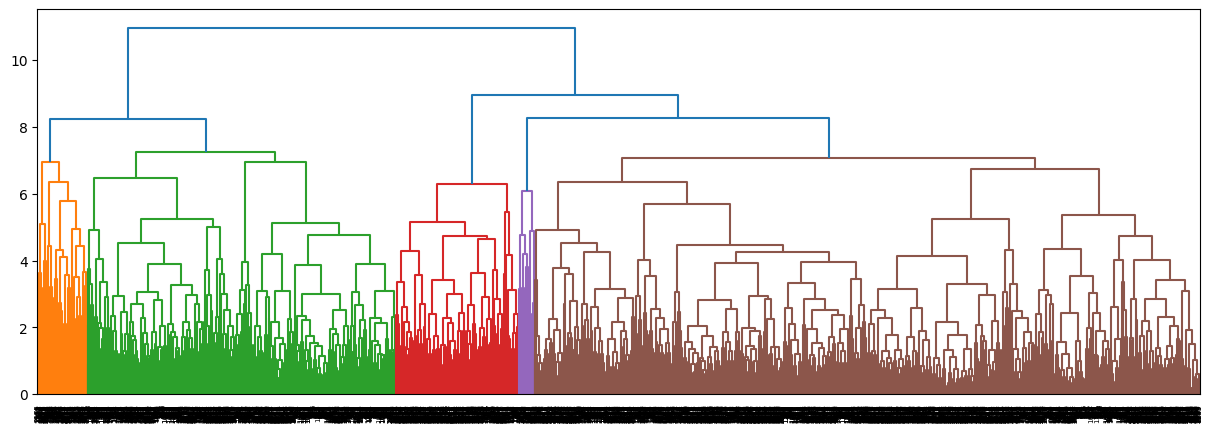

In [31]:
fig=plt.figure(figsize=(15,5))
dendrogram=sch.dendrogram(sch.linkage(fly_1_transform, method='complete'))

In [32]:
hc_comp=AgglomerativeClustering(n_clusters=5, affinity= 'euclidean', linkage='complete')

In [33]:
y_hc_comp=hc_comp.fit_predict(fly_1_transform)
y_hc_comp

array([1, 1, 1, ..., 1, 2, 1])

In [34]:
df_3=pd.DataFrame(y_hc_comp, columns=['Clusters_comp'])

In [35]:
fly_hc_comp=pd.concat([fly,df_3], axis=1)
fly_hc_comp.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters_comp
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [36]:
fly_hc_comp.groupby('Clusters_comp').mean().reset_index()

,Clusters_comp,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0,1475.911404,145838.029218,0.000000,3.541942,1.004713,1.032045,39928.083883,19.713478,809.139491,2.377003,5095.663525,0.553252
1,1,2168.733392,39231.260927,0.000000,1.506119,1.016608,1.005682,7506.878497,7.910839,53.164773,0.161713,3831.724213,0.220717
2,2,2607.044811,46620.754717,0.000000,1.268868,1.030660,1.000000,8399.268868,9.099057,1110.594340,3.367925,3094.386792,0.573113
3,3,2367.264151,46202.320755,2805.528302,1.000000,1.000000,1.000000,2909.528302,3.962264,188.245283,0.566038,3446.471698,0.264151
4,4,1724.895954,159656.138728,2471.797688,2.549133,1.011561,1.011561,30678.092486,19.144509,2189.341040,6.606936,4635.560694,0.763006


In [37]:
for i in range(5):
  print('Custers:',i)
  print('Total Memebers:', len(list(fly_hc_comp[fly_hc_comp['Clusters_comp']==i]['ID'].values)))
  print()

Custers: 0
Total Memebers: 1061

Custers: 1
Total Memebers: 2288

Custers: 2
Total Memebers: 424

Custers: 3
Total Memebers: 53

Custers: 4
Total Memebers: 173



In [38]:
sil_comp=(sil(fly_1_transform,hc_comp.labels_)*100).round(2)
sil_comp

19.99

**KMeans Clustering**

In [39]:
from sklearn.cluster import KMeans

Elbow Chart

[35990.99999999994, 25933.434876791347, 20141.949681280472, 17007.222771907356, 14738.193420328844, 13275.728335535285, 12075.529706252943, 11280.856412996014, 10624.379153070644, 9978.812564200278]


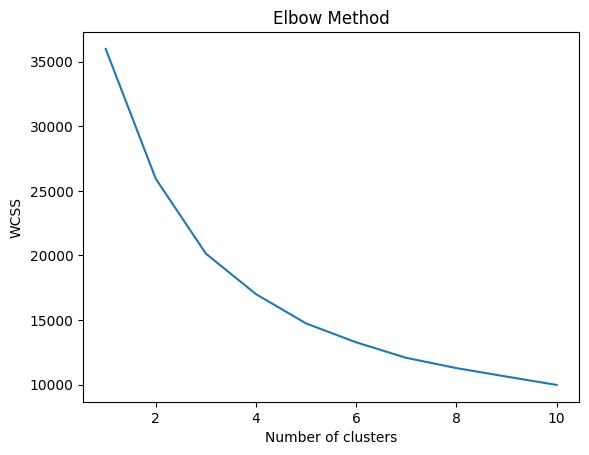

In [40]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(fly_1_transform)
    wcss.append(kmeans.inertia_)

print(wcss)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [41]:
KM=KMeans(5, random_state=0)
KM.fit(fly_1_transform)

KMeans(n_clusters=5, random_state=0)

In [42]:
KM.labels_

array([3, 3, 3, ..., 1, 0, 3], dtype=int32)

In [43]:
df_4=pd.DataFrame(KM.labels_, columns=['Clusters_KM'])

In [44]:
fly_KM=pd.concat([fly, df_4], axis =1)
fly_KM.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Clusters_KM
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2


In [45]:
KM.cluster_centers_

array([[ 1.60074522e-02, -2.44743303e-01, -8.19239258e-01,
         7.32640630e-19, -4.23704588e-33, -2.79105284e-01,
        -2.72262658e-01,  1.45172819e+00,  1.43587521e+00,
        -9.52588092e-02,  7.15349601e-02],
       [ 3.71613101e-01, -2.44743303e-01,  9.10506666e-01,
         2.91327607e-19,  2.55720899e-18,  7.17781846e-01,
         5.92471428e-01, -6.83308041e-01, -6.74970335e-01,
         2.39016631e-01,  1.81555873e-01],
       [ 7.54505594e-01, -2.44743303e-01,  1.11374957e+00,
         2.77052025e-19,  2.98460591e-18,  1.03665259e+00,
         1.04603128e+00,  1.45646102e+00,  1.41053352e+00,
         3.58290326e-01,  6.72519442e-01],
       [-6.75212840e-01, -2.32991180e-01, -8.35590446e-01,
         4.66045113e-19,  7.89631277e-33, -9.09080934e-01,
        -8.19433548e-01, -6.82084186e-01, -6.73778986e-01,
        -3.10971055e-01, -5.14035484e-01],
       [ 5.95617244e-01,  4.08591363e+00,  6.27073775e-02,
         1.71909534e-19,  1.23462301e-18,  3.71406537e-01,
  

In [46]:
fly_KM.groupby('Clusters_KM').mean().reset_index()

,Clusters_KM,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0,2147.846422,69243.130890,0.000000,1.020942,1.026178,1.000000,5429.420593,8.059337,1211.178010,3.598604,3907.469459,0.404887
1,1,1758.691264,89382.907549,0.000000,3.128923,1.011026,1.023749,27971.685327,16.074640,0.000000,0.000000,4593.606446,0.458015
2,2,1623.148820,140109.272232,0.000000,3.607985,1.009074,1.034483,43060.114338,22.517241,1373.820327,4.096189,4849.402904,0.695100
3,3,2339.791045,28510.248982,8.273406,1.006784,1.015604,1.000000,2228.580054,4.679104,0.033921,0.000678,3501.601764,0.122117
4,4,1846.139640,135354.193694,2541.076577,2.207207,1.009009,1.009009,24601.418919,15.864865,1751.049550,5.283784,4422.950450,0.657658


In [47]:
for i in range(5):
  print('Cluster:',i)
  print('Total Members:',len(list(fly_KM[fly_KM['Clusters_KM']==i]['ID'].values)))
  print()

Cluster: 0
Total Members: 573

Cluster: 1
Total Members: 1179

Cluster: 2
Total Members: 551

Cluster: 3
Total Members: 1474

Cluster: 4
Total Members: 222



In [48]:
sil_KM=(sil(fly_1_transform, KM.labels_)*100).round(2)
sil_KM

32.52

**DBSCAN**

In [49]:
from sklearn.cluster import DBSCAN

In [50]:
dbscan=DBSCAN(eps=0.8, min_samples=6)
dbscan.fit(fly_1_transform)

DBSCAN(eps=0.8, min_samples=6)

In [51]:
dbscan.labels_

array([0, 0, 0, ..., 4, 6, 0])

In [52]:
df_5=pd.DataFrame(dbscan.labels_, columns=['Cluster_DBSCAN'])

In [53]:
fly_DBSCAN=pd.concat([fly,df_5], axis=1)
fly_DBSCAN

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster_DBSCAN
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,5
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,6


In [54]:
fly_DBSCAN.groupby('Cluster_DBSCAN').mean().reset_index()

,Cluster_DBSCAN,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,-1,1851.126794,158960.930622,1172.767943,2.136364,1.031100,1.040670,26549.947368,16.789474,1257.198565,3.992823,4465.978469,0.669856
1,0,2342.317871,29560.357414,0.000000,1.000000,1.018251,1.003042,2273.219011,5.279848,0.000000,0.000000,3503.546008,0.000000
2,1,1545.525157,110137.830189,0.000000,3.937107,1.000000,1.040881,49005.849057,22.676101,1258.509434,3.773585,4969.896226,1.000000
3,2,1890.454545,95153.590909,0.000000,3.173401,1.001684,1.013468,25059.821549,15.382155,0.000000,0.000000,4335.638047,0.000000
4,3,2040.023585,86998.745283,0.000000,1.000000,1.018868,1.000000,7647.981132,9.523585,1789.528302,5.207547,4119.863208,1.000000
5,4,1688.371681,70814.004425,0.000000,3.537611,1.000000,1.008850,33450.986726,16.404867,0.000000,0.000000,4745.969027,1.000000
6,5,1901.690722,42647.500000,0.000000,1.000000,1.041237,1.000000,4808.902062,6.324742,0.000000,0.000000,4260.231959,1.000000
7,6,2241.842271,57407.315457,0.000000,1.000000,1.025237,1.000000,3328.820189,7.091483,1132.993691,3.220820,3711.495268,0.000000
8,7,1810.000000,121119.594595,0.000000,3.398649,1.000000,1.020270,30575.182432,18.351351,795.175676,2.114865,4503.141892,0.000000
9,8,1012.363636,84710.454545,2525.181818,4.181818,1.000000,1.000000,51956.909091,18.636364,1230.000000,2.818182,5791.090909,1.000000


In [55]:
for i in range(5):
  print('Cluster:',i)
  print('Total Members:',len(list(fly_DBSCAN[fly_DBSCAN['Cluster_DBSCAN']==i]['ID'].values)))
  print()

Cluster: 0
Total Members: 1315

Cluster: 1
Total Members: 318

Cluster: 2
Total Members: 594

Cluster: 3
Total Members: 212

Cluster: 4
Total Members: 452



In [56]:
sil_DBSCAN=(sil(fly_1_transform,dbscan.labels_)*100).round(2)
sil_DBSCAN

23.41

In [57]:
s={'Model':['Average','Centroid','Complete','KMeans','DBSCAN'],'Sillhouette Score':[sil_avg, sil_cent ,sil_comp, sil_KM ,sil_DBSCAN]}
S=pd.DataFrame(s)
S

,Model,Sillhouette Score
0,Average,24.51
1,Centroid,32.41
2,Complete,19.99
3,KMeans,32.52
4,DBSCAN,23.41


**Conclusion:**

After applying to hierarchial, Kmeans and DBSCAN clustering, KMeans clustering is sensitive to outlier, but gives a high silhouette score(32.52%).

Hierarchial clustering is way more complex to understand from dendogram, in which centroid linkage gives a better resultin sillhouette score, which is similar to KMeans score.

Therefore, 5 clusters is the perfect number for making inferences on this dataset.

